<a href="https://colab.research.google.com/github/maeliech/BigDataPhysics/blob/main/BigDataProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bifurcation diagram

In [44]:
import matplotlib.pyplot as plt
import numpy as np

Importing libraries

In [45]:
def logistic_map(r, x):
    return r*x*(1 - x)

Defining the equation of the logistic map

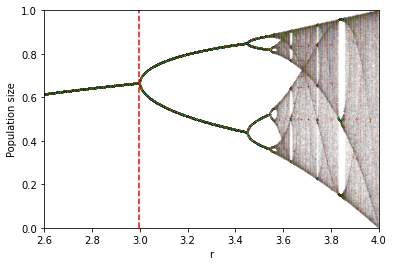

In [46]:
m = 1000   # number of iterations to plot
r_values = np.arange(2.5, 4.0, 0.001) # values of r to plot 
x = np.zeros(m)
x[0] = 0.4  # initial population size

for r in r_values:
    bifurcation = []
    for i in range(m-1):
      x[i+1] = r*x[i]*(1-x[i]) #logistic_map(r, x)
      bifurcation.append(x)
    plt.plot([r]*(m//2),x[m//2:],'.',alpha=0.25,markersize=0.1) #starting at m//2 so we discard the first half

plt.axvline(x = 2.998, color = 'r', linestyle = '--') #moment where the bifurcation starts, right before 3.0
plt.xlim(2.6,4)
plt.ylim(0,1.0)

plt.xlabel('r')
plt.ylabel('Population size')
plt.show()

# Plotting lyapunov exponent

In [47]:
def lyapunov_exponent(r, x0, n):
    x = x0
    sum = 0
    for i in range(n):
        x = logistic_map(r, x)
        sum += np.log(abs(r - 2 * r * x))
    return sum/n

Defining the lyapunov exponent

<ipython-input-47-b677c9fdb880>:6: RuntimeWarning: divide by zero encountered in log
  sum += np.log(abs(r - 2 * r * x))


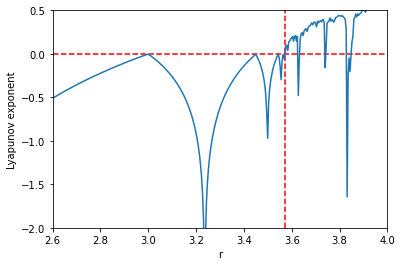

In [48]:
n = 1000  # number of iterations for Lyapunov exponent calculation
r_values = np.linspace(0, 4, 1000)  # parameter values
x0 = 0.4   # initial population size

lyapunov = [lyapunov_exponent(r, x0, n) for r in r_values]

plt.axvline(x = 3.5699, color = 'r', linestyle = '--') 
plt.axhline(y = 0.0, color = 'r', linestyle = '--')
plt.xlim(2.6,4.0)
plt.ylim(-2,0.5)

plt.plot(r_values, lyapunov)
plt.xlabel('r')
plt.ylabel('Lyapunov exponent')
plt.show()

This code generates a Lyapunov plot for the logistic map with 1000 parameter values ranging from 0 to 4. The initial population size is set to 0.4, and 1000 iterations are used to calculate the Lyapunov exponent for each parameter value. The Lyapunov exponent is plotted as a function of the parameter value, with positive values indicating chaotic behavior and negative values indicating stable behavior. Around 3.5699, the curve goes above 0.